In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df=pd.read_csv('cricket_shot_selection_updated.csv')

In [39]:
df.head()

,Bowler Type,Ball Length,Ball Line,Speed (km/h),Shot Type,Runs Scored,Wicket,Field Placement,Angle,Bounce (cm),Field Positions
0,Fast,Good,Off-stump,143,Straight Drive,1,0,Defensive,12.186259,59,Mid-wicket
1,Fast,Full,Middle,124,Edge,0,1,Aggressive,-8.558394,110,Mid-wicket
2,Fast,Short,Off-stump,130,Hook,0,0,Aggressive,3.626683,113,Square Leg
3,Fast,Short,Off-stump,144,Edge,0,0,Balanced,-0.303302,49,Square Leg
4,Spin,Good,Off-stump,146,Edge,0,0,Aggressive,14.080987,28,Cover


In [40]:
df.tail()

,Bowler Type,Ball Length,Ball Line,Speed (km/h),Shot Type,Runs Scored,Wicket,Field Placement,Angle,Bounce (cm),Field Positions
9995,Fast,Short,Off-stump,136,Flick,4,0,Aggressive,-6.865793,78,Slips
9996,Fast,Full,Leg-stump,129,Sweep,6,0,Balanced,10.160395,109,Fine Leg
9997,Spin,Good,Middle,116,Edge,6,0,Balanced,1.164965,90,Slips
9998,Fast,Full,Off-stump,145,Defensive,4,0,Defensive,12.773107,94,Fine Leg
9999,Fast,Good,Leg-stump,131,Pull,0,0,Balanced,-1.806062,82,Cover


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bowler Type      10000 non-null  object 
 1   Ball Length      10000 non-null  object 
 2   Ball Line        10000 non-null  object 
 3   Speed (km/h)     10000 non-null  int64  
 4   Shot Type        10000 non-null  object 
 5   Runs Scored      10000 non-null  int64  
 6   Wicket           10000 non-null  int64  
 7   Field Placement  10000 non-null  object 
 8   Angle            10000 non-null  float64
 9   Bounce (cm)      10000 non-null  int64  
 10  Field Positions  10000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 859.5+ KB


In [42]:
df.columns

Index(['Bowler Type', 'Ball Length', 'Ball Line', 'Speed (km/h)', 'Shot Type',
       'Runs Scored', 'Wicket', 'Field Placement', 'Angle', 'Bounce (cm)',
       'Field Positions'],
      dtype='object')

In [43]:
df['Runs Scored'] = pd.to_numeric(df['Runs Scored'], errors='coerce')
df['Wicket'] = pd.to_numeric(df['Wicket'], errors='coerce')

df = df.dropna()
df.head()


,Bowler Type,Ball Length,Ball Line,Speed (km/h),Shot Type,Runs Scored,Wicket,Field Placement,Angle,Bounce (cm),Field Positions
0,Fast,Good,Off-stump,143,Straight Drive,1,0,Defensive,12.186259,59,Mid-wicket
1,Fast,Full,Middle,124,Edge,0,1,Aggressive,-8.558394,110,Mid-wicket
2,Fast,Short,Off-stump,130,Hook,0,0,Aggressive,3.626683,113,Square Leg
3,Fast,Short,Off-stump,144,Edge,0,0,Balanced,-0.303302,49,Square Leg
4,Spin,Good,Off-stump,146,Edge,0,0,Aggressive,14.080987,28,Cover


<b> RQ1

In [44]:
length_line = (
    df.groupby(['Ball Length','Ball Line'])
      .agg(
          balls=('Runs Scored','count'),
          avg_runs=('Runs Scored','mean'),
          wickets=('Wicket','sum')
      )
)

length_line['wicket_rate'] = length_line['wickets'] / length_line['balls']

print(length_line.sort_values(['avg_runs','wicket_rate']))

                       balls  avg_runs  wickets  wicket_rate
Ball Length Ball Line                                       
Full        Off-stump   1075  1.520000       40     0.037209
Good        Leg-stump   1076  1.538104       61     0.056691
            Off-stump   1153  1.549003       70     0.060711
Short       Off-stump   1125  1.558222       63     0.056000
Full        Middle      1127  1.576752       52     0.046140
            Leg-stump   1121  1.578947       62     0.055308
Short       Middle      1123  1.581478       71     0.063224
            Leg-stump   1063  1.614299       47     0.044214
Good        Middle      1137  1.665787       51     0.044855


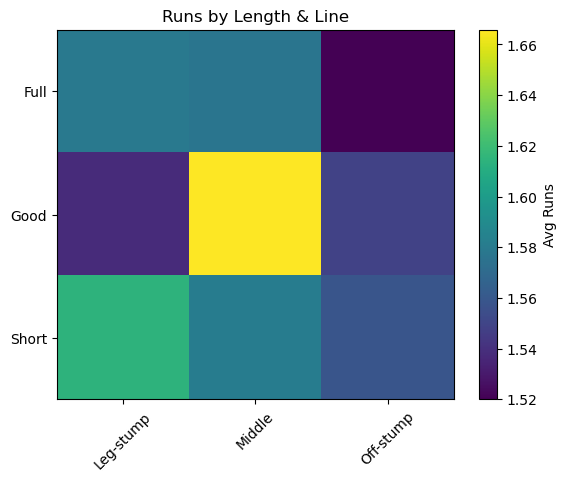

In [45]:
pivot_runs = df.pivot_table(values='Runs Scored',
                            index='Ball Length',
                            columns='Ball Line',
                            aggfunc='mean')

plt.imshow(pivot_runs, aspect='auto')
plt.colorbar(label='Avg Runs')
plt.xticks(range(len(pivot_runs.columns)), pivot_runs.columns, rotation=45)
plt.yticks(range(len(pivot_runs.index)), pivot_runs.index)
plt.title("Runs by Length & Line")
plt.show()

<b> RQ2

In [46]:
shot_stats = (
    df.groupby('Shot Type')
      .agg(
          balls=('Shot Type','count'),
          runs=('Runs Scored','sum'),
          wickets=('Wicket','sum')
      )
)

shot_stats['runs_per_ball'] = shot_stats['runs']/shot_stats['balls']
shot_stats['wicket_rate'] = shot_stats['wickets']/shot_stats['balls']

print(shot_stats.sort_values('runs_per_ball', ascending=False))

                balls  runs  wickets  runs_per_ball  wicket_rate
Shot Type                                                       
Pull             1108  1803       45       1.627256     0.040614
Straight Drive   1133  1831       56       1.616064     0.049426
Hook             1083  1726       64       1.593721     0.059095
Flick            1073  1709       57       1.592731     0.053122
Cover Drive      1154  1830       72       1.585789     0.062392
Cut              1074  1695       46       1.578212     0.042831
Defensive        1125  1749       56       1.554667     0.049778
Sweep            1130  1730       65       1.530973     0.057522
Edge             1120  1688       56       1.507143     0.050000


<b> RQ3

In [47]:
df['speed_bin'] = pd.cut(df['Speed (km/h)'], bins=6)

speed_stats = (
    df.groupby('speed_bin')
      .agg(
          avg_runs=('Runs Scored','mean'),
          wicket_rate=('Wicket','mean')
      )
)

print(speed_stats)

                  avg_runs  wicket_rate
speed_bin                              
(109.961, 116.5]  1.535017     0.052239
(116.5, 123.0]    1.630448     0.049552
(123.0, 129.5]    1.589709     0.055518
(129.5, 136.0]    1.621041     0.049208
(136.0, 142.5]    1.555043     0.056032
(142.5, 149.0]    1.528281     0.048874


<b> RQ4

In [48]:
field_stats = (
    df.groupby('Field Placement')
      .agg(
          balls=('Field Placement','count'),
          avg_runs=('Runs Scored','mean'),
          wickets=('Wicket','sum')
      )
)

field_stats['wicket_rate'] = field_stats['wickets']/field_stats['balls']

print(field_stats.sort_values('avg_runs'))

                 balls  avg_runs  wickets  wicket_rate
Field Placement                                       
Aggressive        3273  1.536205      166     0.050718
Defensive         3424  1.589077      201     0.058703
Balanced          3303  1.602180      150     0.045413


<b> RQ5

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [50]:
X = df[['Bowler Type','Ball Length','Ball Line','Speed (km/h)','Angle','Bounce (cm)']]
y = df['Wicket']

cat_cols = ['Bowler Type','Ball Length','Ball Line']
num_cols = ['Speed (km/h)','Angle','Bounce (cm)']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', 'passthrough', num_cols)
])

model = Pipeline([
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=1000))
])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model.fit(X_train,y_train)

print("Model Accuracy:", model.score(X_test,y_test))

Model Accuracy: 0.9465
